In [1]:
import numpy as np
from sampler import Sampler, load_from_files
from s_manager import SManager
import hickle
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]

In [2]:
sampler = Sampler(seed=99, niter=2000, burn_in=10, best_type="mean", random_the_long_way=True)
sampler.load_sim(4, 8, 8, add_noise=False)
print("Likelihood before run", sampler.vis_redcal.get_unnormalized_likelihood(unity_N=True, over_all=True)) 
print("RMS before run", sampler.vis_redcal.get_rms())   

gauss = lambda x, y: np.exp(-0.5*(x**2+y**2)/.005)

sm = SManager(sampler.vis_redcal.ntime, sampler.vis_redcal.nfreq, sampler.vis_redcal.nant)
sm.generate_S(gauss, modes=3, ignore_threshold=0, zoom_from=(64, 64), scale=2)    # Contains all times/freqs

# V prior
V_mean = sampler.vis_redcal.V_model
Cv_diag = np.full(V_mean.shape[2]*2, 2)

sampler.set_S_and_V_prior(sm, V_mean, Cv_diag)

sampler.run()

print("Likelihood after run", sampler.vis_sampled.get_unnormalized_likelihood(unity_N=True, over_all=True))   
print("RMS after run", sampler.vis_sampled.get_rms())   


Likelihood before run 1.0
RMS before run 0.0
252 modes selected out of 448 (56.00000000000001%)
Running sampling
Time accumulated: 0. Memory: 0.11 GB
Iter 0
Time accumulated: 0.09 s, 0.0 m, 0.0 h. Time since last report: 0.09 s, 0.0 m, 0.0 h.
Memory: 0.11 GB. Memory change since last report: 0.0 GB.
Iter 1000
Time accumulated: 85.62 s, 1.43 m, 0.02 h. Time since last report: 85.53 s, 1.43 m, 0.02 h.
Memory: 0.12 GB. Memory change since last report: 0.01 GB.
Likelihood after run 0.0
RMS after run 1516.2751422672031


Plot results
Name: Redcal Amp Slope: 1.0000000391378 Error: 1.6056589807510256e-07
Name: Sampled Amp Slope: 0.9932415432223367 Error: 36006.27791136037
Name: Redcal Phase Slope: 1.000000039137801 Error: 1.605658979066033e-07
Name: Sampled Phase Slope: 0.9932415432223377 Error: 36006.27791136044


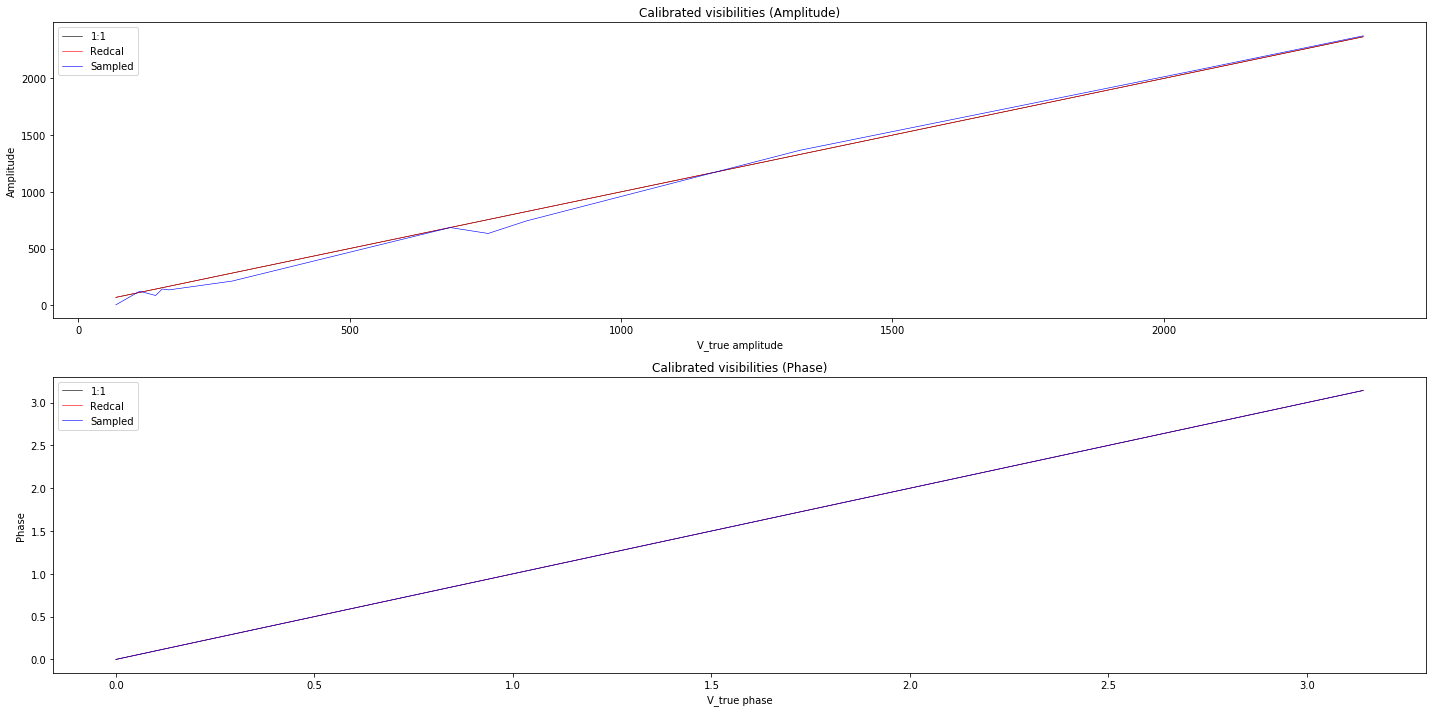

In [3]:
sampler.plot_results(time=0, freq=0)

Plot marginals


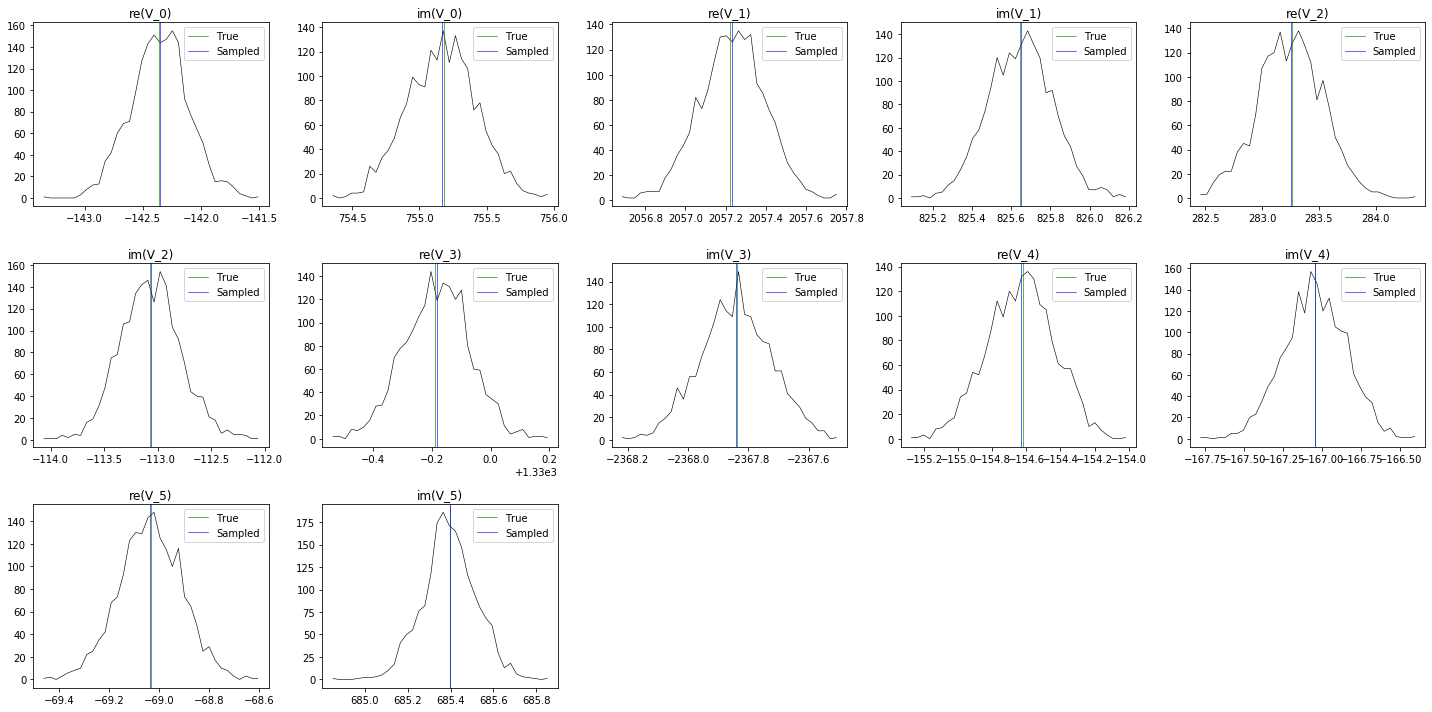

In [4]:
sampler.plot_marginals("V", 5, time=0, freq=0, which=[ "Sampled", "True" ])

Plot marginals


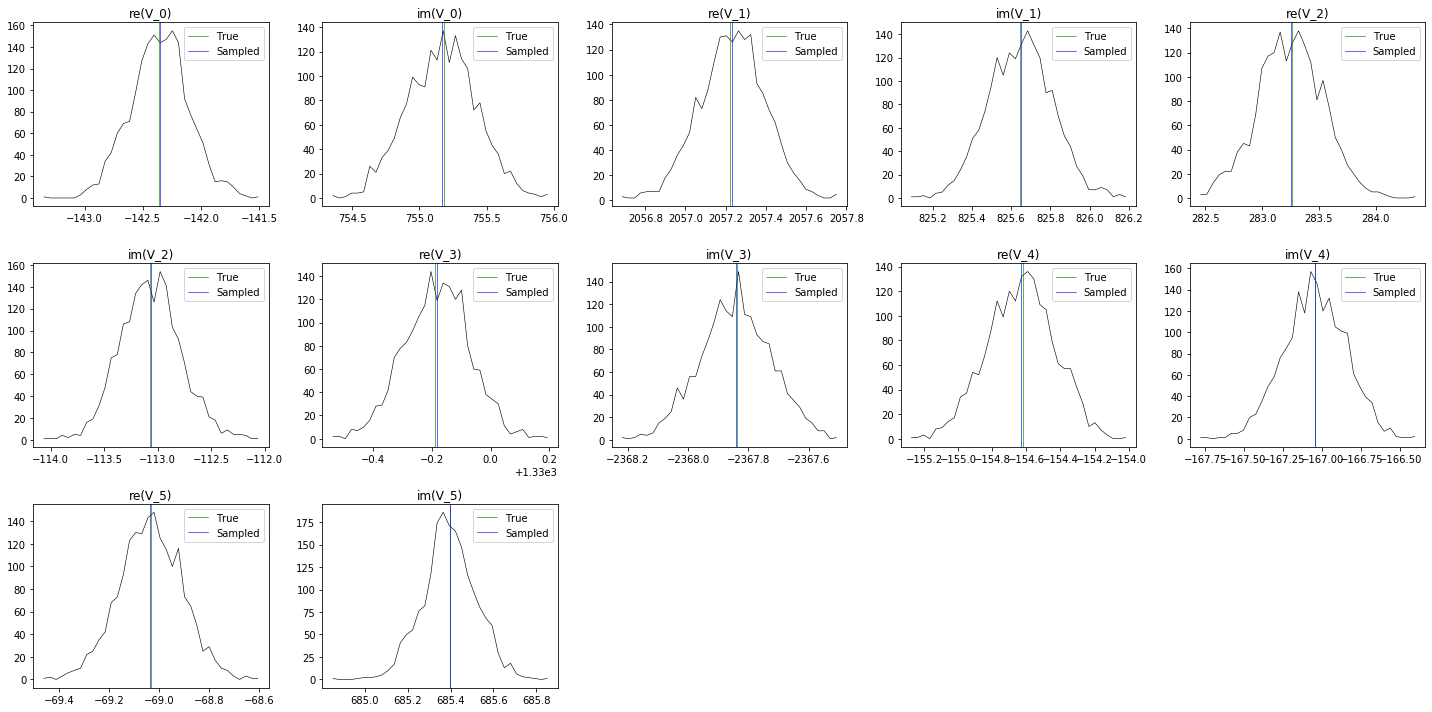

In [5]:
sampler.plot_marginals("V", 5, time=0, freq=0, which=[ "True", "Sampled" ])


In [6]:
sampler.print_sample_stats("x", time=0, freq=0)

Stats for x samples

  Time  Freq   Parameter      Mean       Variance       Sigma
    0     0    re(x_0)     -0.129671     0.000000     0.000091
    0     0    im(x_0)      0.067227     0.000000     0.000122
    0     0    re(x_1)      0.200413     0.000000     0.000093
    0     0    im(x_1)      0.098170     0.000000     0.000122
    0     0    re(x_2)     -0.072605     0.000000     0.000088
    0     0    im(x_2)      0.084109     0.000000     0.000116
    0     0    re(x_3)      0.138461     0.000000     0.000125
    0     0    im(x_3)      0.000000     0.000000     0.000000


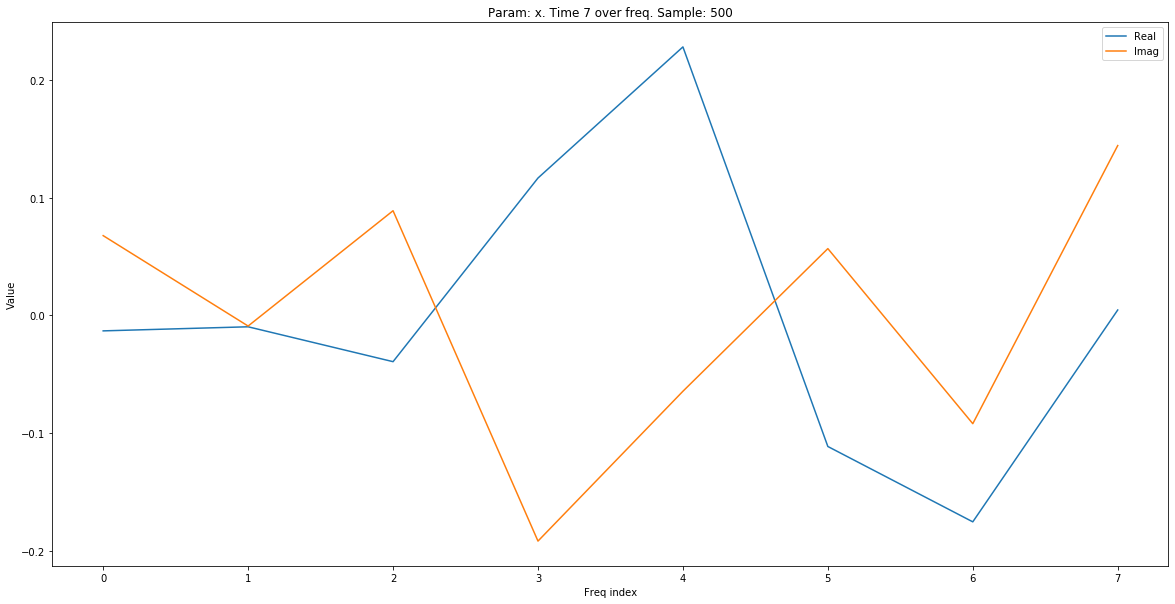

In [7]:
sampler.plot_one_over_time_freq("x", 500, 2, time=7)

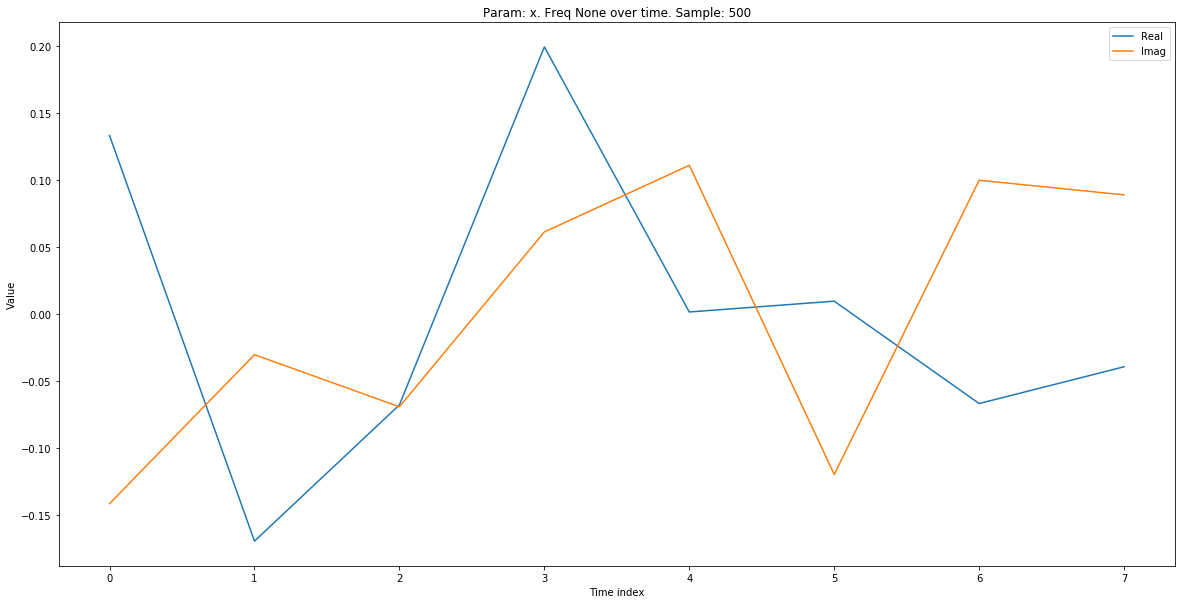

In [8]:
sampler.plot_one_over_time_freq("x", 500, 2, freq=2)

Plotting correlation matrix
x values: 448, V values: 768
Matrix size (1216, 1216)
Corr range for ['x', 'V'] -0.8964510803912691 0.9527774802303351


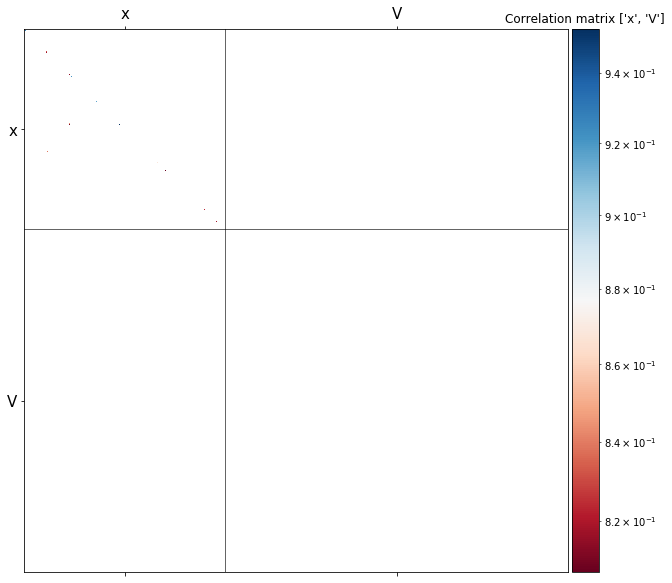

In [9]:
sampler.plot_covcorr(["x", "V"], threshold=0.8, log=True)